In [122]:
import matplotlib.pyplot as plt


import requests
import os 
from dotenv import load_dotenv

load_dotenv()

# API-nyckel
api_key = os.getenv("CMC_API_KEY")

url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"


headers = {
    "Accepts": "application/json",
    "X-CMC_PRO_API_KEY": api_key
}

# Skicka GET-förfrågan
response = requests.get(url, headers=headers)

# Kolla om hämtningen lyckades
if response.status_code == 200:
    data = response.json()
    print("Data saved")  
else:
    print("Fel:", response.status_code, response.text)


Data saved


In [123]:
import pandas as pd

df = pd.DataFrame(data["data"])

print(df.head(5))

     id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             11937   
1  1027     Ethereum    ETH  ethereum              9926   
2   825  Tether USDt   USDT    tether            116336   
3    52          XRP    XRP       xrp              1528   
4  5426       Solana    SOL    solana               840   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2013-08-04T00:00:00.000Z   
4  2020-04-10T00:00:00.000Z   

                                                tags    max_supply  \
0  [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1  [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2  [stablecoin, asset-backed-stablecoin, ethereum...           NaN   
3  [medium-of-exchange, enterprise-solutions, xrp...  1.000000e+11   
4  [pos, platform, solana-ecosystem, cms-holdings...           NaN   

   circulating_supply  total_supply  

In [124]:
df.tail(5)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote
95,6538,Curve DAO Token,CRV,curve-dao-token,810,2020-08-14T00:00:00.000Z,"[decentralized-exchange-dex-token, defi, dao, ...",NaN,1.282407e+09,2.225580e+09,False,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",96,NaN,NaN,NaN,2025-02-12T13:55:00.000Z,"{'USD': {'price': 0.51314732786065, 'volume_24..."
96,28081,SPX6900,SPX,spx6900,327,2023-08-17T10:00:00.000Z,"[memes, ethereum-ecosystem, solana-ecosystem, ...",1.000000e+09,9.309931e+08,9.309931e+08,False,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",97,9.309931e+08,6.445140e+08,NaN,2025-02-12T13:55:00.000Z,"{'USD': {'price': 0.692286601267817, 'volume_2..."
97,5665,Helium,HNT,helium,179,2020-06-05T00:00:00.000Z,"[mineable, enterprise-solutions, distributed-c...",2.230000e+08,1.773946e+08,1.773946e+08,False,None,98,NaN,NaN,NaN,2025-02-12T13:55:00.000Z,"{'USD': {'price': 3.6577365172920375, 'volume_..."
98,4195,FTX Token,FTT,ftx-token,245,2019-07-31T00:00:00.000Z,"[marketplace, centralized-exchange, derivative...",NaN,3.288951e+08,3.288951e+08,False,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",99,NaN,NaN,NaN,2025-02-12T13:55:00.000Z,"{'USD': {'price': 1.9663761762157805, 'volume_..."
99,7186,PancakeSwap,CAKE,pancakeswap,1627,2020-09-25T00:00:00.000Z,"[collectibles-nfts, decentralized-exchange-dex...",4.500000e+08,2.911754e+08,3.792075e+08,False,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",100,NaN,NaN,0.358149,2025-02-12T13:55:00.000Z,"{'USD': {'price': 2.1227437869583152, 'volume_..."


In [125]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote'],
      dtype='object')

In [126]:
print(df.describe())

                 id  num_market_pairs    max_supply  circulating_supply  \
count    100.000000        100.000000  3.900000e+01        1.000000e+02   
mean   10928.640000       2145.680000  1.317774e+13        2.083858e+13   
std    10455.428368      11902.248261  6.859533e+13        1.214036e+14   
min        1.000000         29.000000  1.005577e+06        2.465240e+05   
25%     3135.500000        230.500000  5.470844e+08        2.926568e+08   
50%     6587.000000        431.500000  1.818000e+09        1.189138e+09   
75%    19108.250000        673.000000  1.935201e+10        5.961106e+09   
max    35347.000000     116336.000000  4.206900e+14        9.860611e+14   

       total_supply    cmc_rank  self_reported_circulating_supply  \
count  1.000000e+02  100.000000                      3.300000e+01   
mean   2.100049e+13   50.500000                      2.627656e+12   
std    1.217917e+14   29.011492                      1.348447e+13   
min    2.465240e+05    1.000000                 

In [127]:
print(df.isnull().sum())

id                                   0
name                                 0
symbol                               0
slug                                 0
num_market_pairs                     0
date_added                           0
tags                                 0
max_supply                          61
circulating_supply                   0
total_supply                         0
infinite_supply                      0
platform                            44
cmc_rank                             0
self_reported_circulating_supply    67
self_reported_market_cap            67
tvl_ratio                           93
last_updated                         0
quote                                0
dtype: int64


In [128]:
print(df["quote"])

0     {'USD': {'price': 94862.10335370452, 'volume_2...
1     {'USD': {'price': 2593.7686191577636, 'volume_...
2     {'USD': {'price': 0.9999290677851272, 'volume_...
3     {'USD': {'price': 2.3830165130812255, 'volume_...
4     {'USD': {'price': 191.60675113241564, 'volume_...
                            ...                        
95    {'USD': {'price': 0.51314732786065, 'volume_24...
96    {'USD': {'price': 0.692286601267817, 'volume_2...
97    {'USD': {'price': 3.6577365172920375, 'volume_...
98    {'USD': {'price': 1.9663761762157805, 'volume_...
99    {'USD': {'price': 2.1227437869583152, 'volume_...
Name: quote, Length: 100, dtype: object


In [129]:
print(df.dtypes)

id                                    int64
name                                 object
symbol                               object
slug                                 object
num_market_pairs                      int64
date_added                           object
tags                                 object
max_supply                          float64
circulating_supply                  float64
total_supply                        float64
infinite_supply                        bool
platform                             object
cmc_rank                              int64
self_reported_circulating_supply    float64
self_reported_market_cap            float64
tvl_ratio                           float64
last_updated                         object
quote                                object
dtype: object


In [130]:
print(df['symbol'].unique())

['BTC' 'ETH' 'USDT' 'XRP' 'SOL' 'BNB' 'USDC' 'DOGE' 'ADA' 'TRX' 'LINK'
 'AVAX' 'SUI' 'XLM' 'SHIB' 'TON' 'LEO' 'LTC' 'HBAR' 'HYPE' 'DOT' 'BGB'
 'BCH' 'USDe' 'OM' 'UNI' 'DAI' 'ONDO' 'XMR' 'PEPE' 'NEAR' 'AAVE' 'MNT'
 'APT' 'ICP' 'TAO' 'ETC' 'OKB' 'TRUMP' 'VET' 'POL' 'CRO' 'ALGO' 'KAS'
 'RENDER' 'JUP' 'FDUSD' 'FIL' 'ARB' 'GT' 'ATOM' 'FET' 'TIA' 'DEXE' 'KCS'
 'RAY' 'OP' 'STX' 'INJ' 'LDO' 'XDC' 'IMX' 'S' 'BONK' 'THETA' 'GRT' 'ENA'
 'MOVE' 'WLD' 'FLR' 'JASMY' 'QNT' 'SEI' 'EOS' 'SAND' 'ENS' 'XTZ' 'FLOKI'
 'BTT' 'NEXO' 'IOTA' 'GALA' 'VIRTUAL' 'MKR' 'JTO' 'FLOW' 'KAIA' 'BSV'
 'NEO' 'PYTH' 'XAUt' 'RON' 'MELANIA' 'AXS' 'XCN' 'CRV' 'SPX' 'HNT' 'FTT'
 'CAKE']


In [131]:
print(df[df['symbol'] == 'DOGE'])

   id      name symbol      slug  num_market_pairs                date_added  \
7  74  Dogecoin   DOGE  dogecoin              1163  2013-12-15T00:00:00.000Z   

                                                tags  max_supply  \
7  [mineable, pow, scrypt, medium-of-exchange, me...         NaN   

   circulating_supply  total_supply  infinite_supply platform  cmc_rank  \
7        1.480154e+11  1.480154e+11             True     None         8   

   self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
7                               NaN                       NaN        NaN   

               last_updated                                              quote  
7  2025-02-12T13:55:00.000Z  {'USD': {'price': 0.25179952926480653, 'volume...  


In [142]:
doge_info = df[df['symbol'] == 'DOGE']
doge_info[['name','date_added','slug','tags','max_supply']]

,name,date_added,slug,tags,max_supply
7,Dogecoin,2013-12-15T00:00:00.000Z,dogecoin,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN


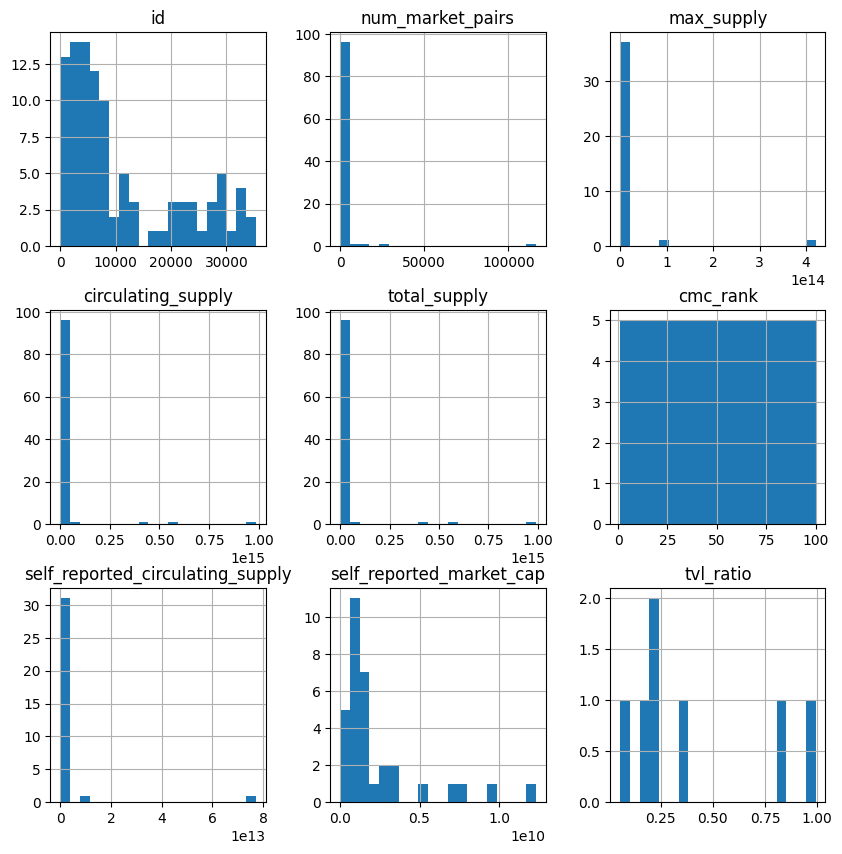

In [133]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(10, 10))
plt.show()


In [143]:
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"

# Headers med API-nyckel
headers = {
    "Accepts": "application/json",
    "X-CMC_PRO_API_KEY": api_key
}

# Skicka GET-förfrågan
response = requests.get(url, headers=headers)

# Kolla om hämtningen lyckades
if response.status_code == 200:
    data = response.json()
    print("Data saved")
else:
    print("Fel:", response.status_code, response.text)

Data saved


In [135]:
df_02 = pd.DataFrame(data['data'])

In [136]:
df_02.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote
0,1,Bitcoin,BTC,bitcoin,11937,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982320e+07,1.982320e+07,False,None,1,NaN,NaN,NaN,2025-02-12T13:55:00.000Z,"{'USD': {'price': 94862.10335370452, 'volume_2..."
1,1027,Ethereum,ETH,ethereum,9926,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205431e+08,1.205431e+08,True,None,2,NaN,NaN,NaN,2025-02-12T13:55:00.000Z,"{'USD': {'price': 2593.7686191577636, 'volume_..."
2,825,Tether USDt,USDT,tether,116336,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.419533e+11,1.435706e+11,True,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",3,NaN,NaN,NaN,2025-02-12T13:55:00.000Z,"{'USD': {'price': 0.9999290677851272, 'volume_..."
3,52,XRP,XRP,xrp,1528,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.776255e+10,9.998650e+10,False,None,4,NaN,NaN,NaN,2025-02-12T13:55:00.000Z,"{'USD': {'price': 2.3830165130812255, 'volume_..."
4,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.881843e+08,5.939260e+08,True,None,5,NaN,NaN,NaN,2025-02-12T13:55:00.000Z,"{'USD': {'price': 191.60675113241564, 'volume_..."


In [137]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                100 non-null    int64  
 1   name                              100 non-null    object 
 2   symbol                            100 non-null    object 
 3   slug                              100 non-null    object 
 4   num_market_pairs                  100 non-null    int64  
 5   date_added                        100 non-null    object 
 6   tags                              100 non-null    object 
 7   max_supply                        39 non-null     float64
 8   circulating_supply                100 non-null    float64
 9   total_supply                      100 non-null    float64
 10  infinite_supply                   100 non-null    bool   
 11  platform                          56 non-null     object 
 12  cmc_rank 

In [138]:
df_02.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote'],
      dtype='object')

In [139]:
df_02.describe()

,id,num_market_pairs,max_supply,circulating_supply,total_supply,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio
count,100.000000,100.000000,3.900000e+01,1.000000e+02,1.000000e+02,100.000000,3.300000e+01,3.300000e+01,7.000000
mean,10928.640000,2145.680000,1.317774e+13,2.083858e+13,2.100049e+13,50.500000,2.627656e+12,2.331659e+09,0.409095
std,10455.428368,11902.248261,6.859533e+13,1.214036e+14,1.217917e+14,29.011492,1.348447e+13,2.903215e+09,0.360587
min,1.000000,29.000000,1.005577e+06,2.465240e+05,2.465240e+05,1.000000,4.845000e+04,1.890842e+07,0.054928
25%,3135.500000,230.500000,5.470844e+08,2.926568e+08,4.354374e+08,25.750000,3.339317e+08,7.063661e+08,0.197887
50%,6587.000000,431.500000,1.818000e+09,1.189138e+09,1.555084e+09,50.500000,1.011052e+09,1.250487e+09,0.221136
75%,19108.250000,673.000000,1.935201e+10,5.961106e+09,1.000000e+10,75.250000,3.089707e+09,2.633383e+09,0.599373
max,35347.000000,116336.000000,4.206900e+14,9.860611e+14,9.900000e+14,100.000000,7.719851e+13,1.229319e+10,0.993083


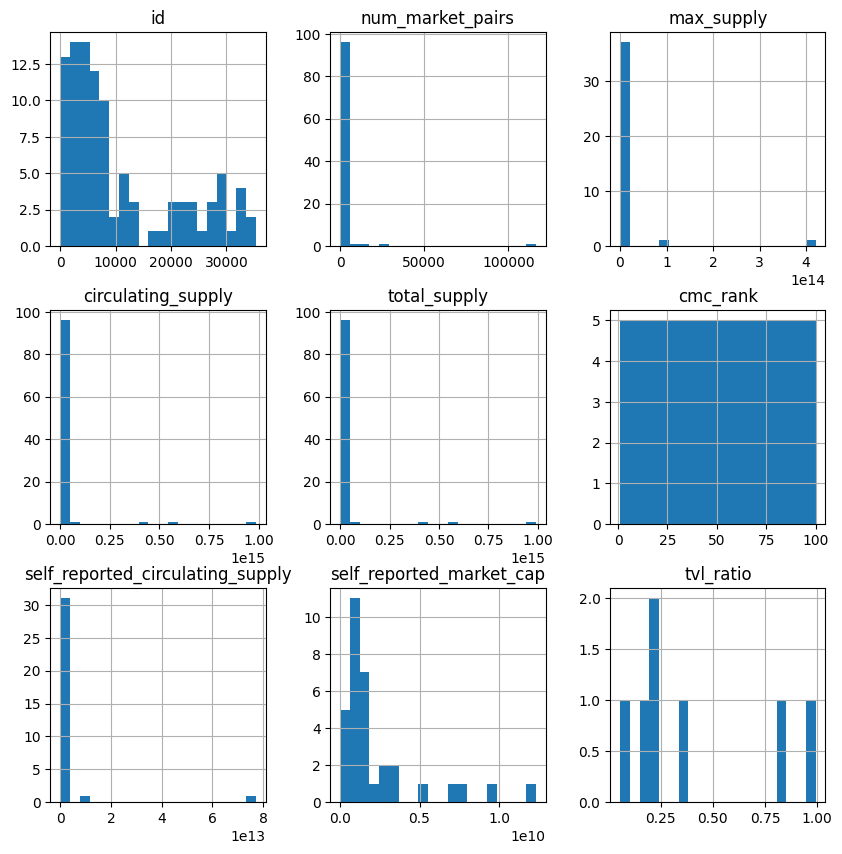

In [140]:

df_02.hist(bins=20, figsize=(10, 10))
plt.show()


In [141]:
df_02.tail()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote
95,6538,Curve DAO Token,CRV,curve-dao-token,810,2020-08-14T00:00:00.000Z,"[decentralized-exchange-dex-token, defi, dao, ...",NaN,1.282407e+09,2.225580e+09,False,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",96,NaN,NaN,NaN,2025-02-12T13:55:00.000Z,"{'USD': {'price': 0.51314732786065, 'volume_24..."
96,28081,SPX6900,SPX,spx6900,327,2023-08-17T10:00:00.000Z,"[memes, ethereum-ecosystem, solana-ecosystem, ...",1.000000e+09,9.309931e+08,9.309931e+08,False,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",97,9.309931e+08,6.445140e+08,NaN,2025-02-12T13:55:00.000Z,"{'USD': {'price': 0.692286601267817, 'volume_2..."
97,5665,Helium,HNT,helium,179,2020-06-05T00:00:00.000Z,"[mineable, enterprise-solutions, distributed-c...",2.230000e+08,1.773946e+08,1.773946e+08,False,None,98,NaN,NaN,NaN,2025-02-12T13:55:00.000Z,"{'USD': {'price': 3.6577365172920375, 'volume_..."
98,4195,FTX Token,FTT,ftx-token,245,2019-07-31T00:00:00.000Z,"[marketplace, centralized-exchange, derivative...",NaN,3.288951e+08,3.288951e+08,False,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",99,NaN,NaN,NaN,2025-02-12T13:55:00.000Z,"{'USD': {'price': 1.9663761762157805, 'volume_..."
99,7186,PancakeSwap,CAKE,pancakeswap,1627,2020-09-25T00:00:00.000Z,"[collectibles-nfts, decentralized-exchange-dex...",4.500000e+08,2.911754e+08,3.792075e+08,False,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",100,NaN,NaN,0.358149,2025-02-12T13:55:00.000Z,"{'USD': {'price': 2.1227437869583152, 'volume_..."
